# Machine Vision 
# Assignment 1 - Image Processing Fundamentals

### Part A: Image types and file formats

Goal: understand types of images such as binary vs grayscale vs RGB and compare their extentions like PNG/JPEG/TIFF. Additionally the tradeoffs of lossy vs lossless.

In [1]:
# Step #1: Loading OpenCV library to proccess images.
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt
import os


In [2]:
#Step #2: Load config.json for loading the images later
with open("../config/config.json", "r") as config:
    config_data = json.load(config)
    images = config_data["images"]
    print("config uploaded")

config uploaded


In [83]:
#Step #3: Open peppers.png and cameraman.tiff 
peppers = cv2.imread(images['peppers']['path'])
cameraman = cv2.imread(images['cameraman']['path'], cv2.IMREAD_GRAYSCALE)

#Step #4: Display size from peppers and cameraman
print(f"peppers.png size: {peppers.shape}")
print(f"cameraman.tif size: {cameraman.shape}")


peppers.png size: (384, 512, 3)
cameraman.tif size: (256, 256)


In [4]:
#Display class from peppers and ccameraman
print(f"peppers.png class: {peppers.dtype}")
print(f"cameraman.tif class: {cameraman.dtype}")

peppers.png class: uint8
cameraman.tif class: uint8


In [5]:
#Display range from peppers and ccameraman
print(f"peppers.png range (min, max): {peppers.min()}, {peppers.max()}")
print(f"cameraman.tif range (min, max): {cameraman.min()}, {cameraman.max()}")

peppers.png range (min, max): 0, 255
cameraman.tif range (min, max): 7, 253


In [6]:
#Step #5: Convert peppers.png to grayscale
original_peppers_gray = cv2.cvtColor(peppers, cv2.COLOR_RGB2GRAY)
#showing the matrix values, in OpenCV when a image is loaded it gets represented as a Numpy Array which is a matrix. 
print(f"original_peppers_gray matrix values:\n {original_peppers_gray[:,:]}")
print(f"class: {original_peppers_gray.dtype}")

original_peppers_gray matrix values:
 [[43 45 46 ... 41 40 40]
 [44 44 45 ... 39 39 39]
 [42 43 44 ... 39 40 39]
 ...
 [96 95 99 ... 31 33 31]
 [92 93 96 ... 29 32 32]
 [93 94 94 ... 29 31 33]]
class: uint8


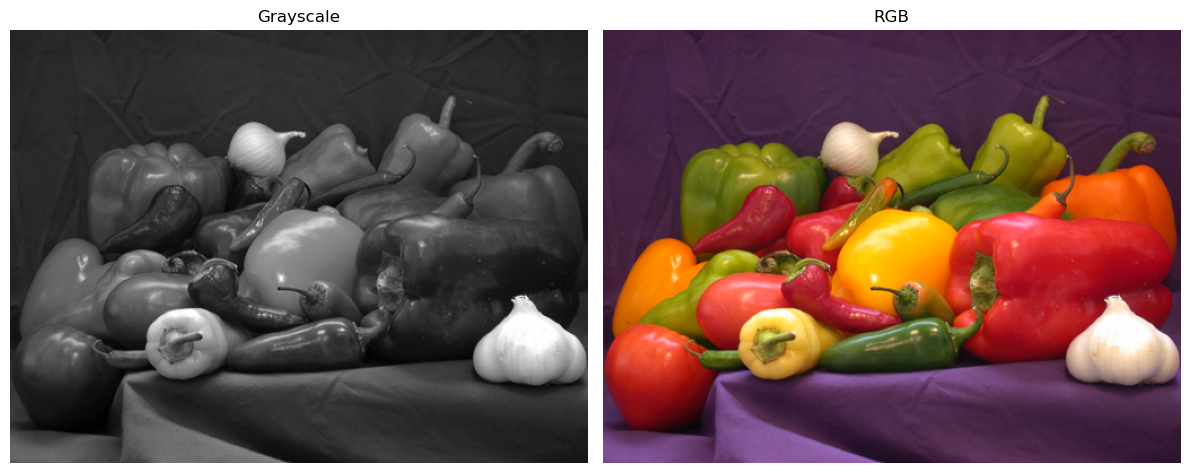

In [7]:
#Showing original_peppers_gray vs rgb version
fig, axes = plt.subplots(1, 2, figsize=(12,5))

#grayscale
axes[0].imshow(original_peppers_gray, cmap='gray')
axes[0].set_title('Grayscale')
axes[0].axis('off')

#rgb, OpenCV opens all images as bgr (blue, green, red) so we need to convert bgr to rgb to get the right colors in the image
axes[1].imshow(cv2.cvtColor(peppers, cv2.COLOR_BGR2RGB))
axes[1].set_title('RGB')
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [8]:
#Step #6: Save grayscale image as PNG, TIFF, JPEG at qualities 95, 75, 50 and check size on disk.


cv2.imwrite('../outputs/original_peppers_gray.png', original_peppers_gray, params = None)
cv2.imwrite('../outputs/original_peppers_gray.tiff', original_peppers_gray, params = None)
cv2.imwrite('../outputs/original_peppers_gray_95.jpeg', original_peppers_gray, [cv2.IMWRITE_JPEG_QUALITY, 95])
cv2.imwrite('../outputs/original_peppers_gray_75.jpeg', original_peppers_gray, [cv2.IMWRITE_JPEG_QUALITY, 75])
cv2.imwrite('../outputs/original_peppers_gray_50.jpeg', original_peppers_gray, [cv2.IMWRITE_JPEG_QUALITY, 50])

#check size on disk
#PNG image file
print(f"size on disk, original_peppers_gray.png: {os.path.getsize('../outputs/original_peppers_gray.png') / 1024:.2f} KB")
#TIFF quality image file
print(f"size on disk, original_peppers_gray.tiff: {os.path.getsize('../outputs/original_peppers_gray.tiff') / 1024:.2f} KB")
#95, 75, 50 quality image file
print(f"size on disk, original_peppers_gray_95: {os.path.getsize('../outputs/original_peppers_gray_95.jpeg') / 1024:.2f} KB")
print(f"size on disk, original_peppers_gray_75: {os.path.getsize('../outputs/original_peppers_gray_75.jpeg') / 1024:.2f} KB")
print(f"size on disk, original_peppers_gray_50: {os.path.getsize('../outputs/original_peppers_gray_50.jpeg') / 1024:.2f} KB")


size on disk, original_peppers_gray.png: 90.17 KB
size on disk, original_peppers_gray.tiff: 106.58 KB
size on disk, original_peppers_gray_95: 47.90 KB
size on disk, original_peppers_gray_75: 18.14 KB
size on disk, original_peppers_gray_50: 11.91 KB


Since png is a lossless image file the image get just compressed down so the size of the image in disk went to 90.17 KB because Opencv has a default compression level of 3 for png images if the params = None. For tiff they are also lossless image so they get compressed down too but quality is conserved but the size in disk is reduced because opencv has a default compression with Lempel-Ziv-Welch (LZW). For JPEG images the quality could be manipulated to reduce the size of the image in disk so it makes JPEG images lossly type, at 95 we could expect good quality, at 75 we might start seeing some noise in the image, at 50 it would be more obvious we reduced the quality of the image to reduce its sizes during compression. 

In [16]:
#Step #7: Calculate MSE, Get PSNR of each image, Display montage of small crops showing compression of any artifacts.
peppers_png = cv2.imread('../outputs/original_peppers_gray.png', cv2.IMREAD_GRAYSCALE)
peppers_tiff = cv2.imread('../outputs/original_peppers_gray.tiff', cv2.IMREAD_GRAYSCALE)
peppers_jpeg_95 = cv2.imread('../outputs/original_peppers_gray_95.jpeg', cv2.IMREAD_GRAYSCALE)
peppers_jpeg_75 = cv2.imread('../outputs/original_peppers_gray_75.jpeg', cv2.IMREAD_GRAYSCALE)
peppers_jpeg_50 = cv2.imread('../outputs/original_peppers_gray_50.jpeg', cv2.IMREAD_GRAYSCALE)

#MSE function
def mse(img1, img2):
    h, w = img1.shape
    diff = cv2.subtract(img1, img2)
    err = np.sum(diff**2)
    return err / (float(h*w)) #mse

# original_peppers_gray vs peppers_png  
print(f"MSE orginal_pepper_gray vs png format: {mse(original_peppers_gray, peppers_png)}")

# original_peppers_gray vs peppers_tiff 
print(f"MSE orginal_pepper_gray vs tiff format: {mse(original_peppers_gray, peppers_tiff)}")

# original_peppers_gray vs peppers_jpeg_95 
print(f"MSE orginal_pepper_gray vs jpeg at 95 format: {mse(original_peppers_gray, peppers_jpeg_95)}")

# original_peppers_gray vs peppers_jpeg_75 
print(f"MSE orginal_pepper_gray vs jpeg at 75 format: {mse(original_peppers_gray, peppers_jpeg_75)}")

# original_peppers_gray vs peppers_jpeg_50 
print(f"MSE orginal_pepper_gray vs jpeg at 50 format: {mse(original_peppers_gray, peppers_jpeg_50)}")


MSE orginal_pepper_gray vs png format: 0.0
MSE orginal_pepper_gray vs tiff format: 0.0
MSE orginal_pepper_gray vs jpeg at 95 format: 0.6280161539713541
MSE orginal_pepper_gray vs jpeg at 75 format: 2.5709330240885415
MSE orginal_pepper_gray vs jpeg at 50 format: 4.0824025472005205


In [19]:
#PSNR
print(f"PSRN png format: {cv2.PSNR(original_peppers_gray, peppers_png)}")
print(f"PSRN tiff format: {cv2.PSNR(original_peppers_gray, peppers_tiff)}")
print(f"PSRN png format: {cv2.PSNR(original_peppers_gray, peppers_jpeg_95)}")
print(f"PSRN png format: {cv2.PSNR(original_peppers_gray, peppers_jpeg_75)}")
print(f"PSRN png format: {cv2.PSNR(original_peppers_gray, peppers_jpeg_50)}")


PSRN png format: 361.20199909921956
PSRN tiff format: 361.20199909921956
PSRN png format: 47.17519007122286
PSRN png format: 40.90857561893803
PSRN png format: 38.582428282720606


For MSE we can see that png, tiff are 0.0 so the compression method previously done on them was confirmed to be lossless vs JPEG qualities being lossly and they have values as seen above. For PSRN the idea is to identify degraded image quality by obtaining higher values the compression method was better and the image is close to the quality of the original one. So we can see again above that png, tiff are better with the maximum signal value of the image and jpeg 95, 75, 50 got the values above.

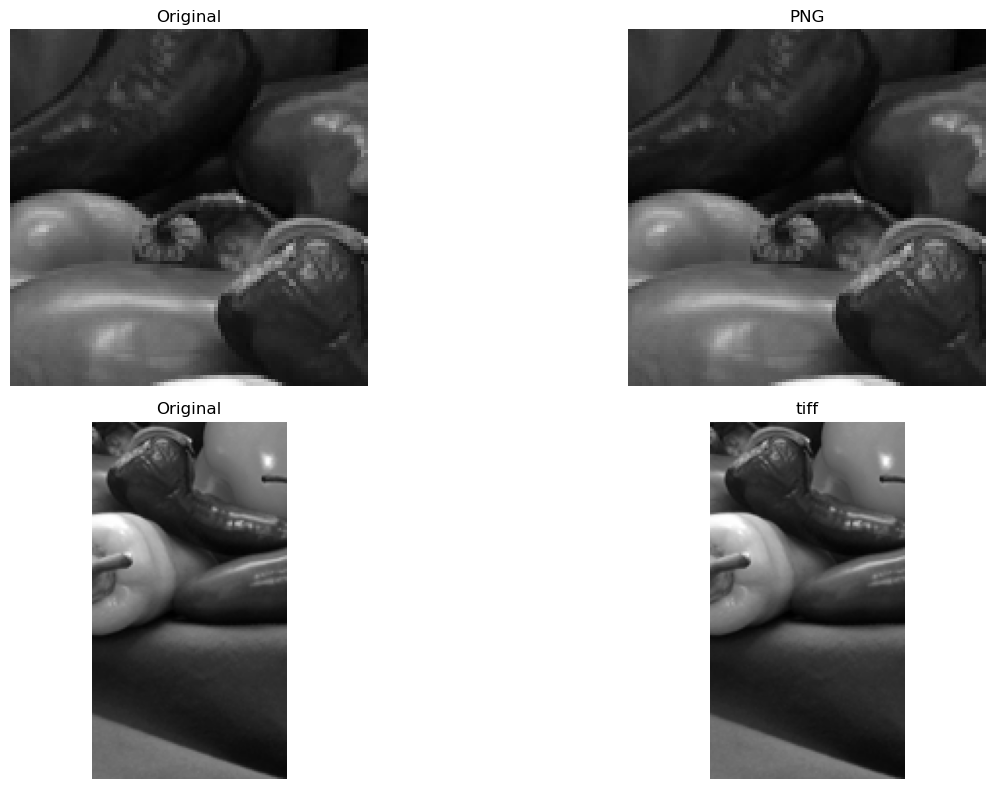

In [60]:
#Display a montage of small crops showing compression artifacts
#Showing original_peppers_gray vs rgb version
fig, axes = plt.subplots(2, 2, figsize=(15,8))

#crop size
def crop_artifact(img, crop_size):
    x_start, y_start, x_end, y_end = crop_size
    crop = img[y_start:y_end, x_start:x_end]
    return crop

#original
axes[0, 0].imshow(crop_artifact(original_peppers_gray, [100, 150, 200, 250]), cmap='gray')
axes[0, 0].set_title('Original')
axes[0, 0].axis('off')

#png
axes[0, 1].imshow(crop_artifact(peppers_png, [100, 150, 200, 250]), cmap='gray')
axes[0, 1].set_title('PNG')
axes[0, 1].axis('off')

#original
axes[1, 0].imshow(crop_artifact(original_peppers_gray, [150, 200, 250, 400]), cmap='gray')
axes[1, 0].set_title('Original')
axes[1, 0].axis('off')

#tiff
axes[1, 1].imshow(crop_artifact(peppers_tiff, [150, 200, 250, 400]), cmap='gray')
axes[1, 1].set_title('tiff')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

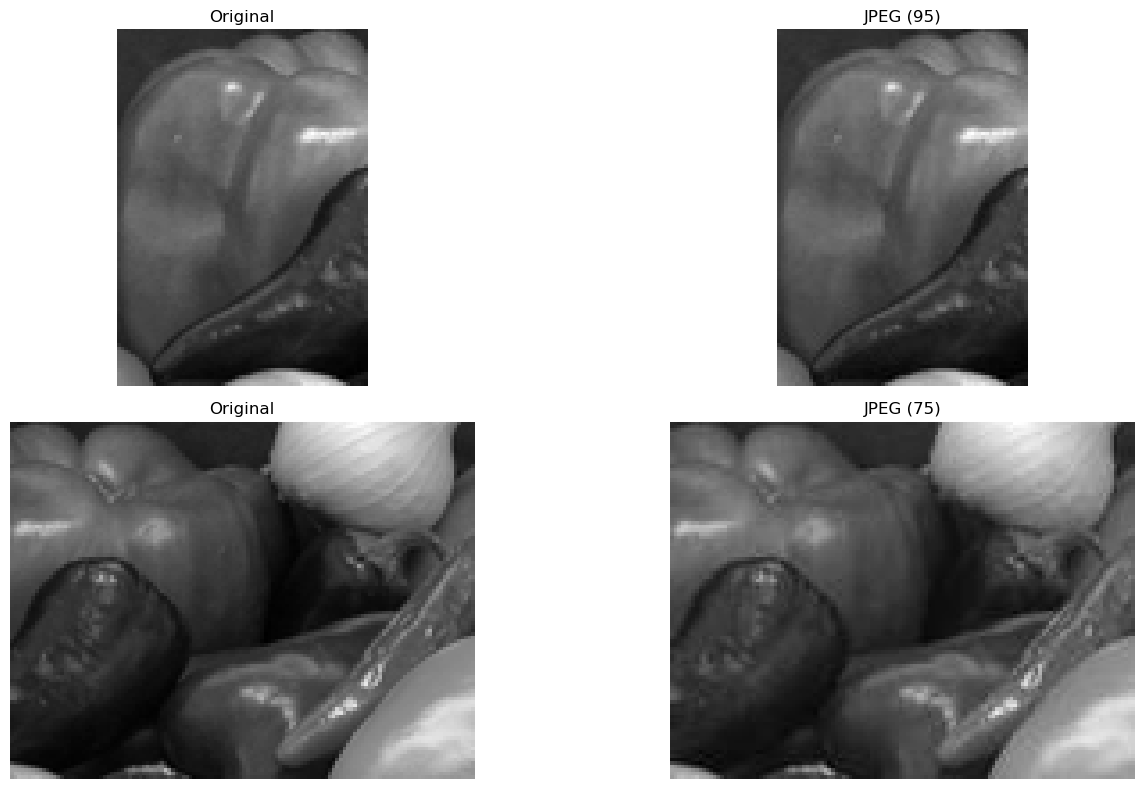

In [61]:
fig, axes = plt.subplots(2, 2, figsize=(15,8))

#original
axes[0, 0].imshow(crop_artifact(original_peppers_gray, [70, 100, 140, 200]), cmap='gray')
axes[0, 0].set_title('Original')
axes[0, 0].axis('off')

#JPEG 95
axes[0, 1].imshow(crop_artifact(peppers_jpeg_95, [70, 100, 140, 200]), cmap='gray')
axes[0, 1].set_title('JPEG (95)')
axes[0, 1].axis('off')

#original
axes[1, 0].imshow(crop_artifact(original_peppers_gray, [120, 100, 250, 200]), cmap='gray')
axes[1, 0].set_title('Original')
axes[1, 0].axis('off')

#JPEG 75
axes[1, 1].imshow(crop_artifact(peppers_jpeg_75, [120, 100, 250, 200]), cmap='gray')
axes[1, 1].set_title('JPEG (75)')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

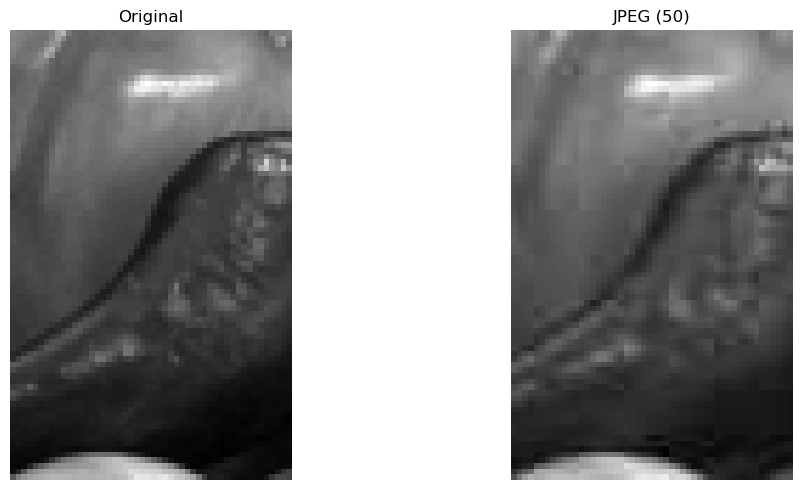

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

#original
axes[0].imshow(crop_artifact(original_peppers_gray, [100, 120, 150, 200]), cmap='gray')
axes[0].set_title('Original')
axes[0].axis('off')

#JPEG 95
axes[1].imshow(crop_artifact(peppers_jpeg_50, [100, 120, 150, 200]), cmap='gray')
axes[1].set_title('JPEG (50)')
axes[1].axis('off')

plt.tight_layout()
plt.show()

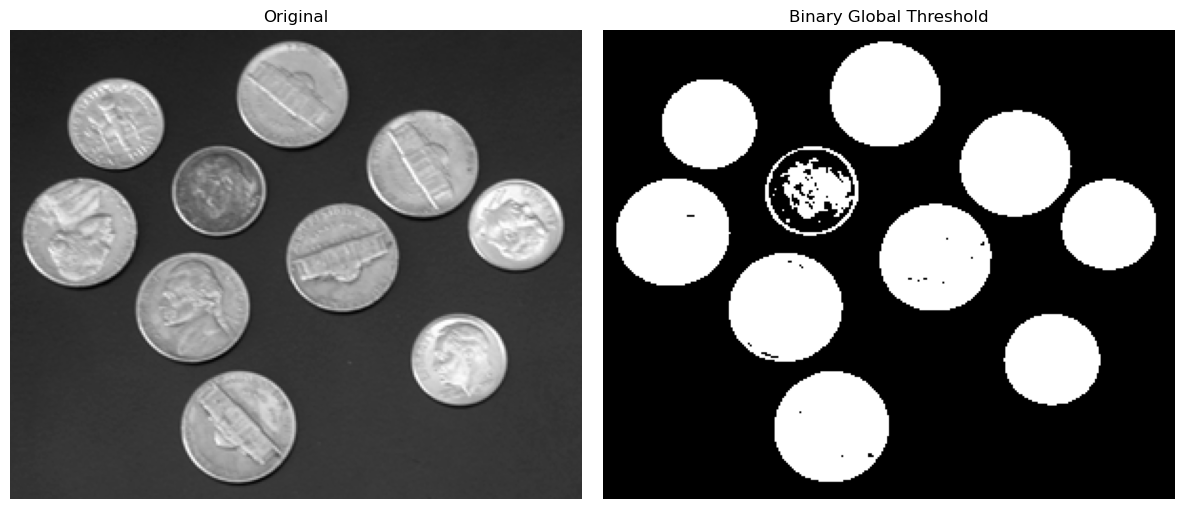

Foreground: 22238, Background: 51562


In [84]:
#Step #8: Binary image
coins = cv2.imread(images['coins']['path'], cv2.IMREAD_GRAYSCALE)
ret, binary_thresh = cv2.threshold(coins, 127, 255, cv2.THRESH_BINARY)

fig, axes = plt.subplots(1, 2, figsize=(12,5))

#original
axes[0].imshow(coins, cmap='gray')
axes[0].set_title('Original')
axes[0].axis('off')

#Binary threshold 
axes[1].imshow(binary_thresh, cmap = 'gray')
axes[1].set_title('Binary Global Threshold')
axes[1].axis('off')

plt.tight_layout()
plt.show()

foreground = np.count_nonzero(binary_thresh)  # Count non-zero (white) pixels
background = binary_thresh.size - foreground   # Total pixels minus foreground

print(f"Foreground: {foreground}, Background: {background}")

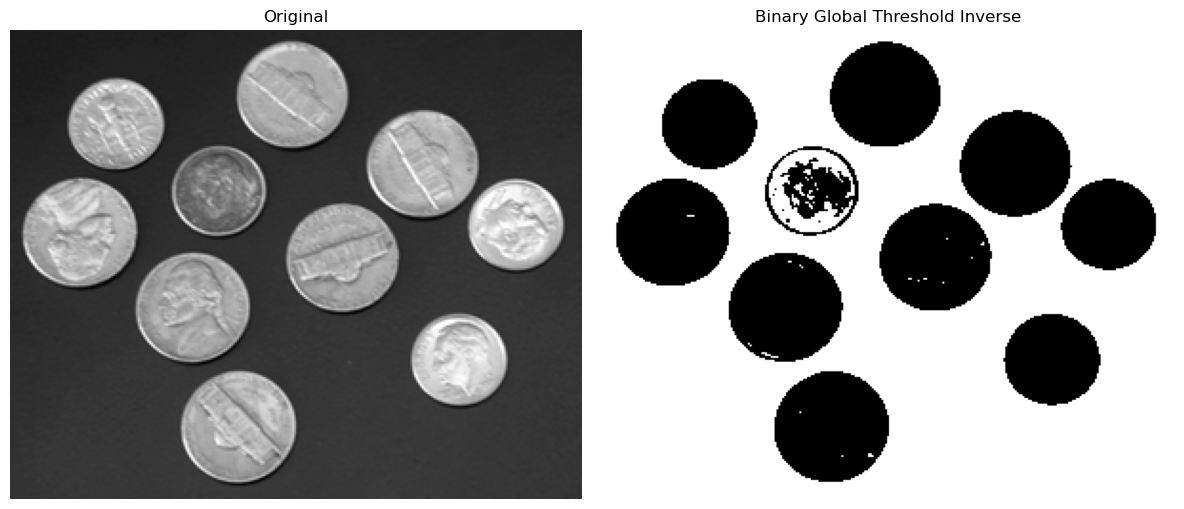

Foreground: 51562, Background: 22238


In [85]:
ret, binary_thresh_inv = cv2.threshold(coins, 127, 255, cv2.THRESH_BINARY_INV)

fig, axes = plt.subplots(1, 2, figsize=(12,5))

#original
axes[0].imshow(coins, cmap='gray')
axes[0].set_title('Original')
axes[0].axis('off')

#Binary threshold inverse
axes[1].imshow(binary_thresh_inv, cmap = 'gray')
axes[1].set_title('Binary Global Threshold Inverse')
axes[1].axis('off')

plt.tight_layout()
plt.show()

foreground = np.count_nonzero(binary_thresh_inv)  # Count non-zero (white) pixels
background = binary_thresh_inv.size - foreground   # Total pixels minus foreground

print(f"Foreground: {foreground}, Background: {background}")

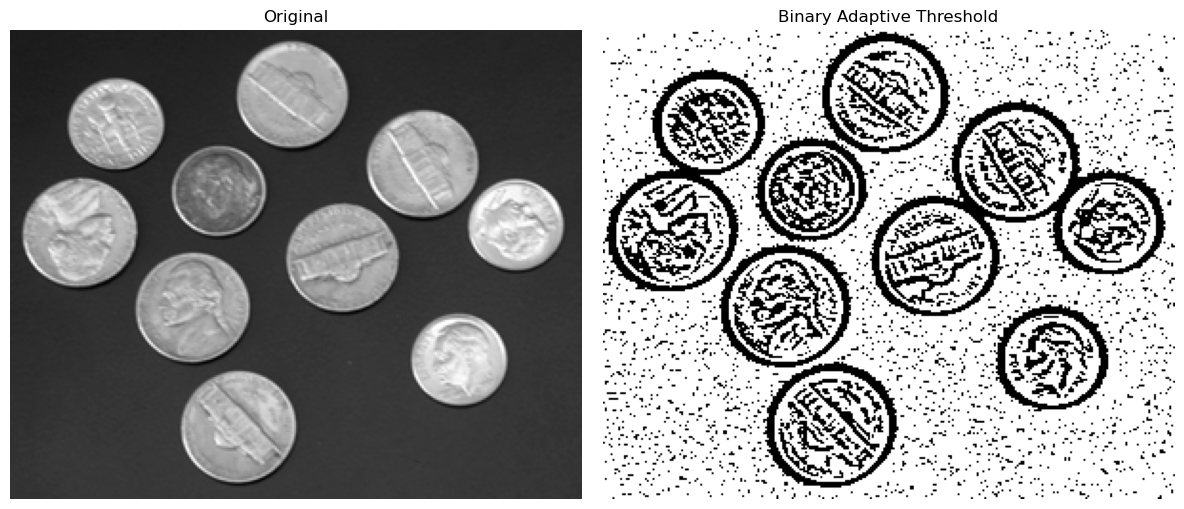

Foreground: 56055, Background: 17745


In [86]:
adaptive_thresh = cv2.adaptiveThreshold(coins, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

fig, axes = plt.subplots(1, 2, figsize=(12,5))

#original
axes[0].imshow(coins, cmap='gray')
axes[0].set_title('Original')
axes[0].axis('off')

#Binary adaptive threshold
axes[1].imshow(adaptive_thresh, cmap = 'gray')
axes[1].set_title('Binary Adaptive Threshold')
axes[1].axis('off')

plt.tight_layout()
plt.show()

foreground = np.count_nonzero(adaptive_thresh)  # Count non-zero (white) pixels
background = adaptive_thresh.size - foreground   # Total pixels minus foreground

print(f"Foreground: {foreground}, Background: {background}")

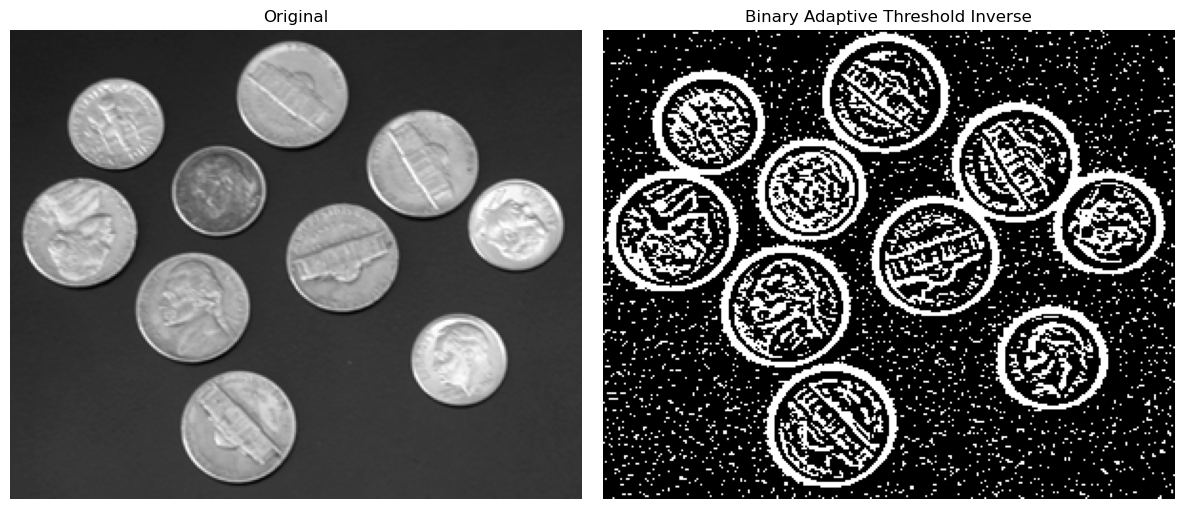

Foreground: 17745, Background: 56055


In [87]:
adaptive_thresh_inv = cv2.adaptiveThreshold(coins, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

fig, axes = plt.subplots(1, 2, figsize=(12,5))

#original
axes[0].imshow(coins, cmap='gray')
axes[0].set_title('Original')
axes[0].axis('off')

#Binary adaptive threshold
axes[1].imshow(adaptive_thresh_inv, cmap = 'gray')
axes[1].set_title('Binary Adaptive Threshold Inverse')
axes[1].axis('off')

plt.tight_layout()
plt.show()

foreground = np.count_nonzero(adaptive_thresh_inv)  # Count non-zero (white) pixels
background = adaptive_thresh_inv.size - foreground   # Total pixels minus foreground

print(f"Foreground: {foreground}, Background: {background}")

### Reflection of part A

1- PNG and TIFF were lossless and JPEG was lossly. File size could track visual quality in the case of JPEG images if their quality is being modified like the case of 50, we got a size of 11.91 KB which means the quality of the image probably was loose a bit to compress it down.

2- PSNR is adequate to compare JPEG qualities because MSE do not take into account any biological factor such as human vision, MSE is pure numerical evaluation of the error between original image and compressed one. So PSRN look at he maximum signal of the image to determine difference between images.

3- Global vs Adaptive binarizing methods, global takes a single threshold value for the entire image meanwhile adaptive calculates different threshold for smaller regions in the image to consider the lighting contions an image could have.

4- When inverting the image, the background change from black to white so if whe have a line in black that a robot could follow inverting the image could give us better track of the width of the image and the robot could precisely follow it.

### Part B: Intensity transforms and geometry

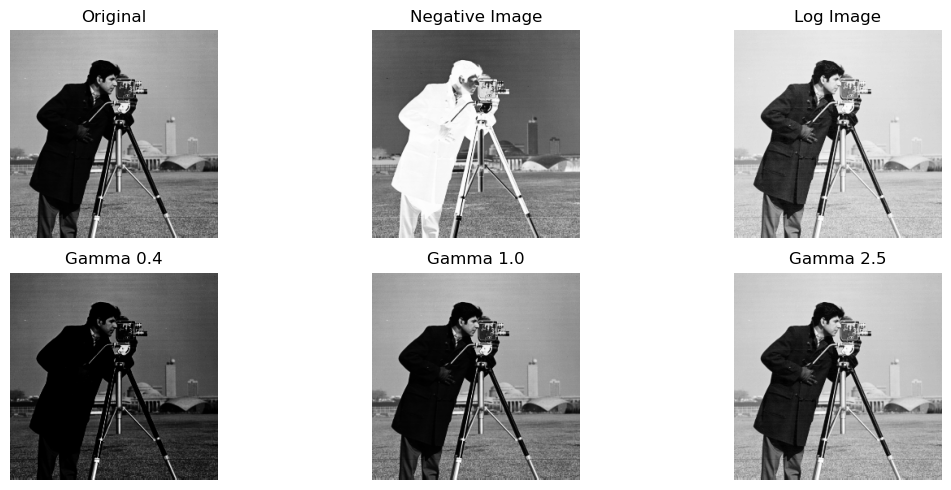

In [92]:
#Step 1: Creating a negative, log and gamma image
#Negative image
cameraman_negative = abs(255-cameraman)

#Log image 
c = 255 / np.log(1 + np.max(cameraman))
cameraman_log = c * (np.log(cameraman + 1))
cameraman_log = np.array(cameraman_log, dtype = np.uint8)

#Gamma
def adjust_gamma(img, gamma_value):
    """It builds a lookup table to map pixel values to their adjusted gamma values"""
    inv_gamma = 1.0/gamma_value
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(img, table)
    
cameraman_gamma_04 = adjust_gamma(cameraman, 0.4)
cameraman_gamma_1 = adjust_gamma(cameraman, 1.0)
cameraman_gamma_25 = adjust_gamma(cameraman, 2.5)

fig, axes = plt.subplots(2, 3, figsize=(12,5))

#original
axes[0,0].imshow(cameraman, cmap='gray')
axes[0,0].set_title('Original')
axes[0,0].axis('off')

#Negative image
axes[0,1].imshow(cameraman_negative, cmap='gray')
axes[0,1].set_title('Negative Image')
axes[0,1].axis('off')

#Log Image
axes[0,2].imshow(cameraman_log, cmap='gray')
axes[0,2].set_title('Log Image')
axes[0,2].axis('off')

#Gamma 4.0
axes[1,0].imshow(cameraman_gamma_04, cmap='gray')
axes[1,0].set_title('Gamma 0.4')
axes[1,0].axis('off')

#Gamma 1.0
axes[1,1].imshow(cameraman_gamma_1, cmap='gray')
axes[1,1].set_title('Gamma 1.0')
axes[1,1].axis('off')

#Gamma 2.5
axes[1,2].imshow(cameraman_gamma_25, cmap='gray')
axes[1,2].set_title('Gamma 2.5')
axes[1,2].axis('off')

plt.tight_layout()
plt.show()

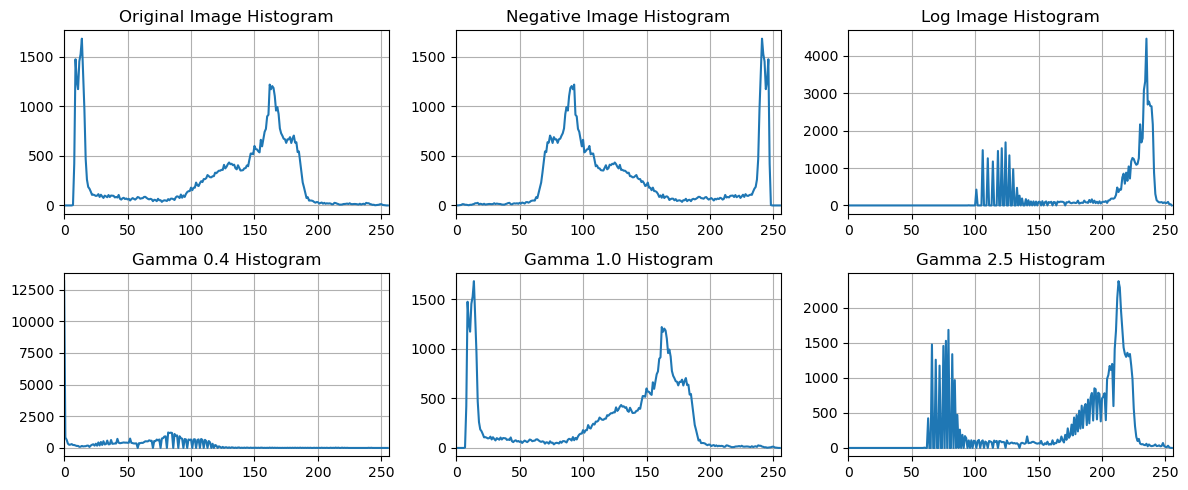

In [98]:
#Calculating Histogram and showing them
original_hist = cv2.calcHist([cameraman], [0], None, [256], [0, 256])
negative_hist = cv2.calcHist([cameraman_negative], [0], None, [256], [0, 256]) 
log_hist = cv2.calcHist([cameraman_log], [0], None, [256], [0, 256]) 
gamma04_hist = cv2.calcHist([cameraman_gamma_04], [0], None, [256], [0, 256]) 
gamma1_hist = cv2.calcHist([cameraman_gamma_1], [0], None, [256], [0, 256]) 
gamma25_hist = cv2.calcHist([cameraman_gamma_25], [0], None, [256], [0, 256]) 

fig, axes = plt.subplots(2, 3, figsize=(12,5))

#original
axes[0,0].plot(original_hist)
axes[0,0].set_title('Original Image Histogram')
axes[0,0].set_xlim([0, 256])
axes[0,0].grid(True)

#Negative image
axes[0,1].plot(negative_hist)
axes[0,1].set_title('Negative Image Histogram')
axes[0,1].set_xlim([0, 256])
axes[0,1].grid(True)

#Log Image
axes[0,2].plot(log_hist)
axes[0,2].set_title('Log Image Histogram')
axes[0,2].set_xlim([0, 256])
axes[0,2].grid(True)

#Gamma 4.0
axes[1,0].plot(gamma04_hist)
axes[1,0].set_title('Gamma 0.4 Histogram')
axes[1,0].set_xlim([0, 256])
axes[1,0].grid(True)

#Gamma 1.0
axes[1,1].plot(gamma1_hist)
axes[1,1].set_title('Gamma 1.0 Histogram')
axes[1,1].set_xlim([0, 256])
axes[1,1].grid(True)

#Gamma 2.5
axes[1,2].plot(gamma25_hist)
axes[1,2].set_title('Gamma 2.5 Histogram')
axes[1,2].set_xlim([0, 256])
axes[1,2].grid(True)

plt.tight_layout()
plt.show()

Original - Min: 7, Max: 253
Stretched - Min: 0, Max: 255


(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

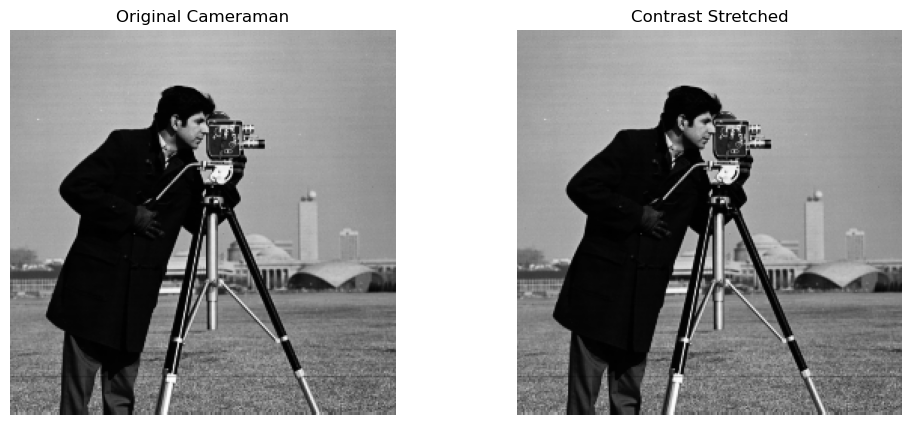

In [108]:
#Step 2: Contrast streching & equalization

def contrastStretch(I, r1, r2, s1, s2):
    s = (I.astype(float) - r1) * (s2 - s1) / (r2 - r1) + s1
    s = np.clip(s, 0, 255)
    return s.astype(np.uint8)

cameraman_contrastStretch = contrastStretch(cameraman, np.min(cameraman), np.max(cameraman), 0, 255 )

print(f"Original - Min: {np.min(cameraman)}, Max: {np.max(cameraman)}")
print(f"Stretched - Min: {np.min(cameraman_contrastStretch)}, Max: {np.max(cameraman_contrastStretch)}")


fig, axes = plt.subplots(1, 2, figsize=(12,5))

axes[0].imshow(cameraman, cmap='gray')
axes[0].set_title('Original Cameraman')
axes[0].axis('off')

axes[1].imshow(cameraman_contrastStretch, cmap='gray')
axes[1].set_title('Contrast Stretched')
axes[1].axis('off')

In [ ]:
#Comparing with equalizeHist in opencv which is equal to histeq, there is not imadjust in opencv 

### Part C: Spatial filtering

### Part D: Frequency-domain filtering

### Part E: Edge detection and a robotics mini task

### Part F: Reflection